In [1]:
import os

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [19]:
orig_df = pd.read_excel("Assignment3_cluster2.xlsx",sheet_name='2557')
orig_df.head()

,ministry,personnel,operation,invest,subsidy,others
0,a,21500.0,69890.0,59825.0,180191.0,11725.0
1,b,3502.4,2012.4,3929.8,7799.0,14916.7
2,c,83944.8,21144.0,6061.4,3308.3,69361.5
3,d,11127.3,6233.1,1703.2,482.4,209250.6
4,e,2730.1,2330.9,1109.4,1027.6,1426.0


<AxesSubplot:>

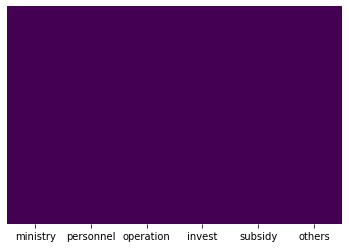

In [20]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [21]:
orig_df.describe()

,personnel,operation,invest,subsidy,others
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,27539.495455,10305.013636,12880.236364,30112.727273,16696.827273
std,57520.856310,15906.733911,22418.507924,69476.446342,45707.785274
min,360.500000,404.200000,210.200000,24.400000,133.600000
25%,2069.825000,2017.325000,656.575000,895.225000,1094.000000
50%,5522.000000,4334.800000,2816.500000,2359.800000,1672.850000
75%,20061.050000,12752.475000,12147.025000,7754.375000,7048.175000
max,259136.600000,69890.000000,88582.000000,252762.400000,209250.600000


In [22]:
orig_df.columns

Index(['ministry', 'personnel', 'operation', 'invest', 'subsidy', 'others'], dtype='object')

In [23]:
df = orig_df[['personnel','operation','invest', 'subsidy','others']]
df

,personnel,operation,invest,subsidy,others
0,21500.0,69890.0,59825.0,180191.0,11725.0
1,3502.4,2012.4,3929.8,7799.0,14916.7
2,83944.8,21144.0,6061.4,3308.3,69361.5
3,11127.3,6233.1,1703.2,482.4,209250.6
4,2730.1,2330.9,1109.4,1027.6,1426.0
5,1204.1,1115.0,5001.7,3854.1,2632.1
6,2449.7,3796.8,751.3,2125.5,1201.3
7,24029.3,13660.6,36316.2,1431.9,1403.0
8,8553.8,2207.2,88582.0,46.4,1187.9
9,9758.8,6451.1,12387.6,1486.7,1403.1


In [24]:
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.081690,1.000000,0.674591,0.712859,0.055430
1,0.012141,0.023144,0.042090,0.030762,0.070693
2,0.322999,0.298475,0.066211,0.012993,0.331049
3,0.041607,0.083886,0.016895,0.001812,1.000000
4,0.009157,0.027728,0.010175,0.003969,0.006180


In [25]:
df_normalized.describe()

,0,1,2,3,4
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.105029,0.142487,0.143372,0.119049,0.079206
std,0.222280,0.228921,0.253684,0.274895,0.218575
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006605,0.023215,0.005051,0.003446,0.004593
50%,0.019946,0.056567,0.029492,0.009240,0.007361
75%,0.076130,0.177709,0.135075,0.030585,0.033066
max,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

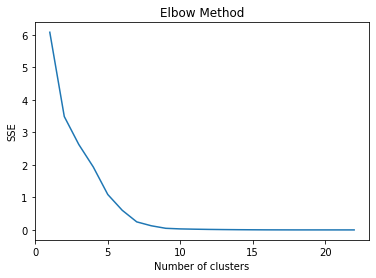

In [26]:
max_k = 23
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [27]:
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [28]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

,personnel,operation,invest,subsidy,others,cluster_id
0,21500.0,69890.0,59825.0,180191.0,11725.0,1
1,3502.4,2012.4,3929.8,7799.0,14916.7,0
2,83944.8,21144.0,6061.4,3308.3,69361.5,0
3,11127.3,6233.1,1703.2,482.4,209250.6,5
4,2730.1,2330.9,1109.4,1027.6,1426.0,0
5,1204.1,1115.0,5001.7,3854.1,2632.1,0
6,2449.7,3796.8,751.3,2125.5,1201.3,0
7,24029.3,13660.6,36316.2,1431.9,1403.0,0
8,8553.8,2207.2,88582.0,46.4,1187.9,2
9,9758.8,6451.1,12387.6,1486.7,1403.1,0


In [29]:
df.cluster_id.value_counts()

0    17
5     1
4     1
3     1
2     1
1     1
Name: cluster_id, dtype: int64

In [30]:
print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.18685466840528184


In [31]:
df[df.cluster_id==0].mean()

personnel     17047.470588
operation      5888.023529
invest         5132.258824
subsidy        4338.358824
others         6259.529412
cluster_id        0.000000
dtype: float64

In [32]:
df.to_csv('cluster_res_kmean57.csv')